<a href="https://colab.research.google.com/github/Anjalijahagirdar/ML-/blob/main/Project_Image_Classification_using_ANN_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Joint Online Faculty Development programme on Deep Learning (Parallel Architecture) Aug 23 – Sep 3 , 2021

# Tutorial 4: Covid 19 Prediction using Artificial Neural Networks

Dataset: [Covid 19 Chest X-ray dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)


A team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh along with their collaborators from Pakistan and Malaysia in collaboration with medical doctors have created a database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images. This COVID-19, normal, and other lung infection dataset is released in stages. In the first release, we have released 219 COVID-19, 1341 normal, and 1345 viral pneumonia chest X-ray (CXR) images. In the first update, we have increased the COVID-19 class to 1200 CXR images. In the 2nd update, we have increased the database to 3616 COVID-19 positive cases along with 10,192 Normal, 6012 Lung Opacity (Non-COVID lung infection), and 1345 Viral Pneumonia images. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients.



**1. Mount the Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Move to the place where data resides**

In [2]:
!cd /content/drive/MyDrive/CSIT1/

In [3]:
!pwd


/content


In [4]:
!ls

drive  sample_data


**3. Unziping the dataset**

In [5]:
!pip install unzip

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1283 sha256=bc4e2dcaf895b3199c3d8b057fcbd04fde5647ae43bc00f73bda72084538a586
  Stored in directory: /root/.cache/pip/wheels/80/dc/7a/f8af45bc239e7933509183f038ea8d46f3610aab82b35369f4
Successfully built unzip


In [6]:
!unzip  /content/drive/MyDrive/CSIT1/covid_dataset.zip

Archive:  /content/drive/MyDrive/CSIT1/covid_dataset.zip
   creating: covid_dataset/
   creating: covid_dataset/COVID/
  inflating: covid_dataset/COVID/COVID-1.png  
  inflating: covid_dataset/COVID/COVID-10.png  
  inflating: covid_dataset/COVID/COVID-11.png  
  inflating: covid_dataset/COVID/COVID-12.png  
  inflating: covid_dataset/COVID/COVID-13.png  
  inflating: covid_dataset/COVID/COVID-14.png  
  inflating: covid_dataset/COVID/COVID-15.png  
  inflating: covid_dataset/COVID/COVID-16.png  
  inflating: covid_dataset/COVID/COVID-17.png  
  inflating: covid_dataset/COVID/COVID-18.png  
  inflating: covid_dataset/COVID/COVID-19.png  
  inflating: covid_dataset/COVID/COVID-2.png  
  inflating: covid_dataset/COVID/COVID-20.png  
  inflating: covid_dataset/COVID/COVID-21.png  
  inflating: covid_dataset/COVID/COVID-22.png  
  inflating: covid_dataset/COVID/COVID-23.png  
  inflating: covid_dataset/COVID/COVID-24.png  
  inflating: covid_dataset/COVID/COVID-25.png  
  inflating: covid_

**4. Install split folder python package**

https://pypi.org/project/split-folders/

In [7]:
!pip install split_folders

**5. Splitting the data in training, testing and validation set**

In [8]:
import splitfolders
splitfolders.ratio("covid_dataset", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 150 files [00:00, 5776.59 files/s]


In [9]:
import splitfolders
splitfolders.ratio("covid_dataset", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 150 files [00:00, 3279.74 files/s]


**6. Loading the dataset with normalization in batches**

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
        'split/train/',
        target_size=(128, 128),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'split/val/',
        target_size=(128, 128),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'split/test/',
        target_size=(128, 128),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 120 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


**7. Model Building**

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(128, 128,3))
x = layers.Flatten()(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                3145792   
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 3150179 (12.02 MB)
Trainable params: 3150179 

**8. Model Compilation and Training**

In [21]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(adam, loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/200
15/15 [==============================] - 2s 45ms/step - loss: 1.0671 - acc: 0.4333 - val_loss: 0.7981 - val_acc: 0.8000
Epoch 2/200
15/15 [==============================] - 0s 23ms/step - loss: 0.7535 - acc: 0.6250 - val_loss: 0.7987 - val_acc: 0.6667
Epoch 3/200
15/15 [==============================] - 0s 25ms/step - loss: 0.6593 - acc: 0.6917 - val_loss: 0.7095 - val_acc: 0.5333
Epoch 4/200
15/15 [==============================] - 0s 23ms/step - loss: 0.5870 - acc: 0.7333 - val_loss: 0.6047 - val_acc: 0.8000
Epoch 5/200
15/15 [==============================] - 0s 24ms/step - loss: 0.5218 - acc: 0.7750 - val_loss: 0.6484 - val_acc: 0.6667
Epoch 6/200
15/15 [==============================] - 0s 24ms/step - loss: 0.5075 - acc: 0.7750 - val_loss: 0.4491 - val_acc: 0.8667
Epoch 7/200
15/15 [==============================] - 0s 23ms/step - loss: 0.4403 - acc: 0.8250 - val_loss: 0.5027 - val_acc: 0.7333
Epoch 8/200
15/15 [==============================] - 0s 23ms/step - loss: 0.

**9. Model saving**

In [22]:
model.save('covid_classification.h5')

**10. Model loading**

In [23]:
from tensorflow.keras import models
model = models.load_model('covid_classification.h5')

**11. Model weights saving**

In [24]:
model.save_weights('covid_classification_weights.h5')

**12. Model weights loading**

In [25]:
model.load_weights('covid_classification_weights.h5')

**13. Plotting accuracy and loss graph for training and validation dataset**

In [26]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

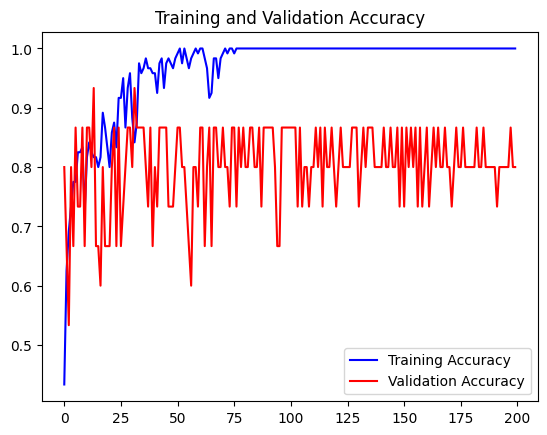

<Figure size 640x480 with 0 Axes>

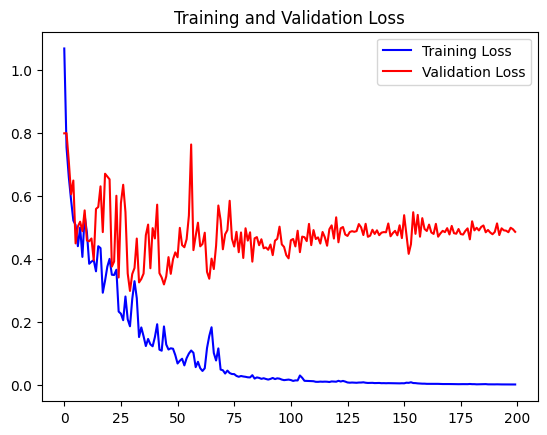

In [27]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**14. Evaluate model performance on test dataset**

In [19]:
test_output= model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
print(test_output)
print(model.metrics_names)

1/1 [==============================] - 0s 38ms/step - loss: 1.0986 - acc: 0.3333
[1.098612666130066, 0.3333333432674408]
['loss', 'acc']


References:

1. https://pypi.org/project/split-folders/
2. https://keras.io/